# Lab 3

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-3](https://yuanyuyuan.github.io/itcm/lab-3.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 10/30(Wed.)**

In [1]:
name = "蔡子暘"
student_id = "B07201025"

---

# Exercise 1

## Let $g(x)=\ln(4+x-x^2)$ and $\alpha$ is a fixed point of $g(x)$ i.e. $\alpha = g(\alpha).$ 

- ### Part A. Implement your fixed-point algorithm and solve it with initial guess $x_0=2$ within tolerance $10^{-10}$, and answer the questions of error behavior analysis below.
- ### Part B. Redo Part A. by applying Aitken's acceleration.

---

### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Implement the target function $g(x)=\ln(4+x-x^2)$

In [3]:
def g(x):
    return np.log(4+x+x**2)

In [4]:
assert round(g(0), 4) == 1.3863

### Run built-in [fixed-point method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html#rf001026ae057-1) with Python SciPy, and use this accurate value as the fixed point $\alpha$

In [5]:
from scipy import optimize
alpha = optimize.fixed_point(g, x0=2, xtol=1e-12)
print('The fixed point is', alpha)

The fixed point is 2.585554633711738


### Visualization

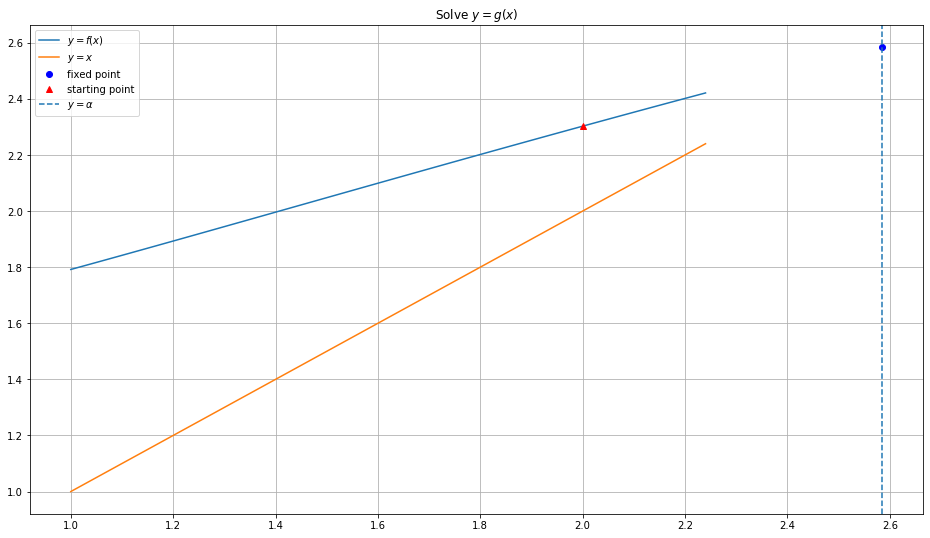

In [6]:
x_range = np.arange(1, 2.25, 0.01)
plt.figure(figsize=(16, 9))
plt.title(r'Solve $y=g(x)$')
plt.plot(x_range, g(x_range), label=r'$y=f(x)$')
plt.plot(x_range, x_range, label=r'$y=x$')
plt.plot(alpha, g(alpha), 'bo', label='fixed point')
plt.plot(2.0, g(2.0), 'r^', label='starting point')
plt.axvline(x=alpha, linestyle='--', label=r'$y=\alpha$')
plt.gca().legend()
plt.grid()
plt.show()

---

## Part A.

### 1. Find the fixed point of $g(x)$ using your fixed-point iteration to within tolerance $10^{-10}$ with initial guess $x_0=2$.

#### 1-1. Implement the fixed point method

In [7]:
def fixed_point(
    func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
):
    x_n = x_0
    num_iterations = 0
    history = {'x_n': []}
        
    while True:
        f_of_x_n = func(x_n)
        num_iterations += 1
        error = abs(f_of_x_n - x_n)
        history['x_n'].append(x_n)
        
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            return x_n, history
            
        if num_iterations < max_iterations:
            x_n = f_of_x_n
        
        else:
            print('Terminate since reached the maximum iterations.')
            return x_n, history

#### 1-2. Find the root

In [8]:
solution, history = fixed_point(
    g,
    x_0=2.0,
    tolerance=1e-10,
    max_iterations=100,
)

Found solution after 30 iterations.


In [9]:
print('My estimation is', solution)

My estimation is 2.585554633568186


### 2. Estimate graphically the asymptotic error constant C 
### $$\lim_{n\to\infty} \frac{|x_{n+1} - \alpha|}{|x_{n} - \alpha|} = C$$

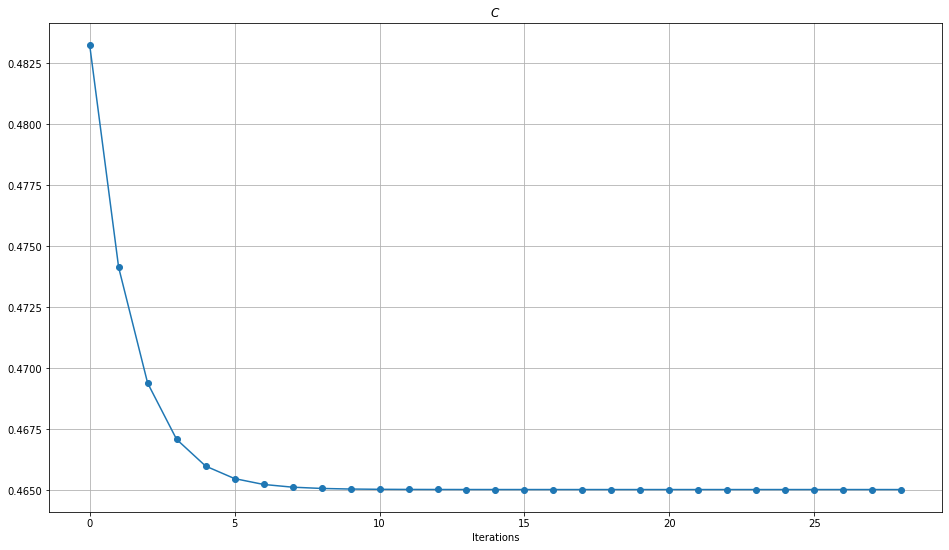

In [10]:
x_n=history['x_n']
e_n=abs(x_n-alpha)
plt.figure(figsize=(16, 9))
plt.title(r'$C$')
plt.xlabel("Iterations")
plt.plot(e_n[1:]/e_n[:-1],'o-')
plt.grid()
plt.show()

---

## Part B.

### 1. Accelerate the convergence of the sequence $\{x_n\}$ obtained in _Part A._ using Aitken's  $\Delta^2$ method, yielding sequence $\{\hat{x}_n\}$. 

#### 1-1. Introduce Aitken's acceleration into the original method.

In [11]:
def aitken(
    func,
    y_0,
    tolerance=1e-7,
    max_iterations=5,
):
    y_n = y_0
    num_iterations = 0
    history = {'y_n': []}
        
    while True:
        y_1=func(y_0)
        y_2=func(y_1)
        y_n=y_2-(y_2-y_1)**2/((y_2-y_1)-(y_1-y_0))
        num_iterations += 1
        error = abs(y_n - y_0)
        history['y_n'].append(y_n)
        
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            return y_n, history
            
        if num_iterations < max_iterations:
            y_0 = y_n
        
        else:
            print('Terminate since reached the maximum iterations.')
            return y_n, history

#### 1-2. Find the root

In [12]:
solution, history2 = aitken(
    g,
    y_0=2.0,
    tolerance=1e-10,
    max_iterations=100,
)

Found solution after 4 iterations.


In [13]:
print('My estimation is', solution)

My estimation is 2.585554633711738


### 2. Plot the error curves of each algorithm w.r.t iterations $n$ in log scale to compare the convergence rates. You may see a figure like the one in our lecture.

<figure>
  <img src="aitken.png" style="width:60%">
    <figcaption>Ref. Page15 of <a href="https://ceiba.ntu.edu.tw/course/7a770d/content/cmath2019_note1_aitken.pdf">cmath2019_note1_aitken.pdf</a></figcaption>
</figure>

/Users/tzuyangtsai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


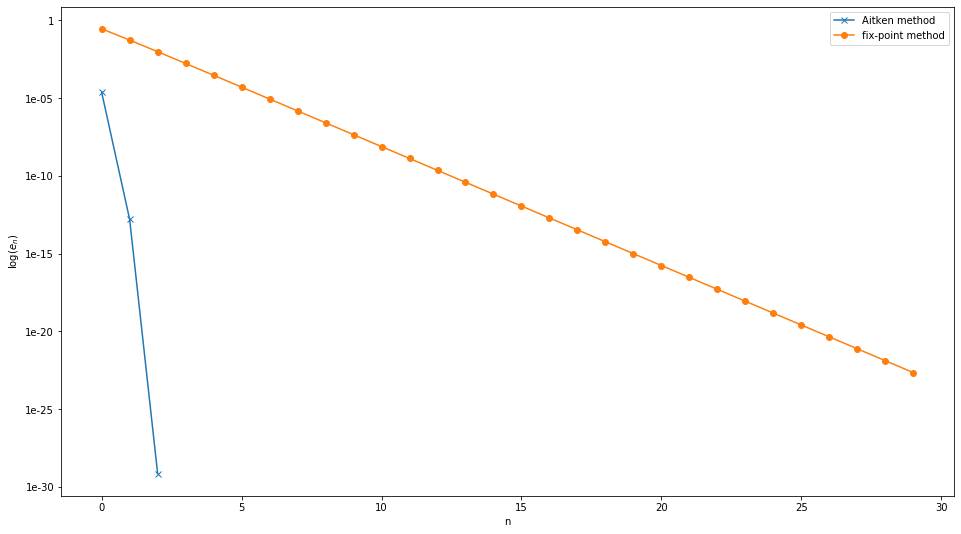

In [14]:
y_n=history['x_n']
e_n=abs(y_n-alpha)
x_n=history2['y_n']
f_n=abs(x_n-alpha)
plt.figure(figsize=(16, 9))
plt.xlabel("n")
plt.ylabel("log($e_n$)")
plt.plot(np.log(f_n),'x-',label='Aitken method')
plt.plot(np.log(e_n),'o-',label='fix-point method')
plt.gca().legend()
plt.yticks([0,-5,-10,-15,-20,-25,-30],[10**0,10**-5,10**-10,10**-15,10**-20,10**-25,10**-30])
plt.show()